__Perspective:__ Demographic Characterization
 
__Goal:__ Divide customers based on their characteristics and see if any significant groups emerge 

__Variables used:__ 
- Birthyear,
- Education,
- Marital_Status,
- Income,
- Kid_Younger6,
- Children_6to18,

__Methods:__

- Identify principal features: Education, Marital Status, Income, Kids
- K-Modes with 'Cao' initialization
- k = 3 & k = 4

__Initial model:__ 
- Kmodes for extra points
- K-Means 

__Source:__ https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering 

<font color='red'>Don't Forget!</font> Put 'Cao' & 'Huang' initializations in the Bible! 

### Demo


| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Name | Customer’s name |
| Birthyear | Customer’s year of birth |
| Education | Customer’s level of education |
| Marital_Status | Customer’s marital status |
| Income | Customer’s yearly household income |
| Kid_Younger6 | Number of kids younger than 6 in the household |
| Children_6to18 | Number of children between 6 and 18 years old in the household |


# Importing the packagez and preparing the variablez

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime
pd.set_option('display.max_columns', None)

from kmodes.kmodes import KModes
from sklearn import preprocessing 

import warnings
warnings.filterwarnings('ignore')

In [3]:
crm = pd.read_csv('https://raw.githubusercontent.com/EFSA-Jedi-Group/Data-Science-and-ML/main/Data/crm.csv')
demo = crm.set_index('CustomerID')

In [5]:
demo_n = demo.copy()

## Droping the columns Gender and Birthyear

In [9]:
demo_n.drop('Name', axis = 1, inplace = True)
demo_n.drop('Birthyear', axis = 1, inplace = True)

## Education

In [10]:
demo_n.Education = demo_n.Education.str.title()  # returns a new string with the first letter of each word capitalized and all other letters in lowercase

demo_n['Education_bins'] = demo_n.Education.replace({
    'Phd': 'High',
    'Master' : 'High',
    'Graduation': 'Low',
    'Basic' : 'Low',
    'Highschool' : 'Low'
})

## Filling MV w/ most frequent value & droping Education

In [12]:
mfv_ = demo_n['Education_bins'].mode()[0]

demo_n['Education_bins'] = demo_n['Education_bins'].fillna(mfv_)

In [13]:
demo_n.drop('Education', axis = 1, inplace = True)

## Marital Status

In [ ]:
demo_n.Marital_Status = demo_n.Marital_Status.str.title()

In [16]:
demo_n['Marital_Status_2'] = demo_n.Marital_Status.replace({
    'Married' : 'Together',
    'Single' : 'Single',
    'Divorced' : 'Single',
    'Widow' : 'Single'
})

In [18]:
demo_n.drop(['Marital_Status'], axis = 1, inplace = True)

## Income - droping outliers and transforming into bins 

In [21]:
demo_n.drop(demo_n[demo_n['Income'] > 200000].index, inplace = True)

In [22]:
demo_n['Income_bins'] = pd.cut(demo_n['Income'], 3, labels=["Low", "Medium", "High"])

In [ ]:
demo_n.groupby('Income_bins').Income.describe()

In [25]:
demo_n.drop(['Income'], axis = 1, inplace = True)

## Kids - preparing and droping 

In [27]:
# Creating var 'Have_kids' that indicates whether a household has kids or not
# apply() to each observation of the vars'Kid_Younger6' & 'Children_6to18' the lambda() - "1 if observation > 0, everything else = 0"

demo_n['Have_kids'] = (demo_n['Kid_Younger6'] + demo_n['Children_6to18']).apply(lambda x: 1 if x > 0 else 0)

In [28]:
demo_n.drop(['Kid_Younger6'], axis = 1, inplace = True)
demo_n.drop(['Children_6to18'], axis = 1, inplace = True)

# Elbow method

In [35]:
# Model Building 

# Making a copy to reset later when joining the clusters colum to the Dataset

# Data preparation

In [ ]:
demo_n_n = demo_n.copy()

## Encoding with preprocessing from sklearn 

In [36]:
le = preprocessing.LabelEncoder()
demo_n_n = demo_n_n.apply(le.fit_transform)
demo_n_n.head(4)

,Education_bins,Marital_Status_2,Income_bins,Have_kids
CustomerID,,,,
14594,1,0,0,0
19070,1,1,0,0
29888,0,1,0,0
12221,1,1,2,1


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10475.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 10475.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 10475.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 10475.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 10475.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 723, cost: 7857.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8315.0
Init: initializing centroids
Init: initializing clusters
Starting iteration

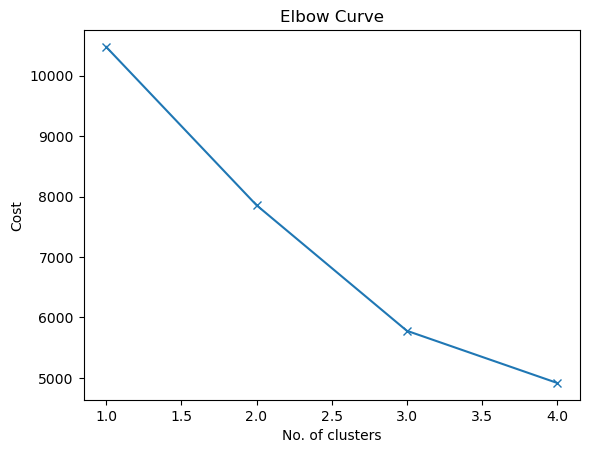

In [37]:
cost = []
K = range(1,5)
for k in list(K):
    kmode = KModes(n_clusters = k, init = 'random', n_init = 5, verbose = 1)
    kmode.fit_predict(demo_n_n)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

# K-Modes, 'Cao' initialization, k = 3

In [38]:
km_n = KModes(n_clusters = 3, init = 'Cao', n_init = 1, verbose = 1)

clust_3 = km_n.fit_predict(demo_n_n)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 154, cost: 7214.0


In [39]:
# Predicted clusters

clust_3

array([1, 0, 1, ..., 0, 0, 1], dtype=uint16)

In [40]:
# The cluster_centroids_ attribute is a NumPy array that contains the coordinates of the centroids of the clusters

# The pd.DataFrame() is used to create a DataFrame object from the cluster_centroids_ array.

clusterCentroidsDf_k3 = pd.DataFrame(km_n.cluster_centroids_)

clusterCentroidsDf_k3.columns = demo_n_n.columns

In [41]:
# Mode of the clusters

clusterCentroidsDf_k3

,Education_bins,Marital_Status_2,Income_bins,Have_kids
0,1,1,2,1
1,0,0,0,0
2,0,1,1,1


In [42]:
# Combining the predicted clusters with the original DF

In [43]:
demo_n_n = demo_n.reset_index()

In [44]:
# Creating a Pandas DF w/ the array of clusters. 
# Creating a col named Clusters_k3 
# Concatenating the DataFrames and droping the DF cluster's index 

clustersDf = pd.DataFrame(clust_3)
clustersDf.columns = ['Clusters_k3']
combinedDf = pd.concat([demo_n_n, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)

In [45]:
combinedDf.head(4)

,CustomerID,Education_bins,Marital_Status_2,Income_bins,Have_kids,Clusters_k3
0,14594,Low,Single,High,0,1
1,19070,Low,Together,High,0,0
2,29888,High,Together,High,0,1
3,12221,Low,Together,Medium,1,0


In [ ]:
# cluster's distribution

combinedDf.value_counts('Clusters_k3')

# Data viz

In [48]:
var = combinedDf[['Education_bins', 'Marital_Status_2', 'Income_bins', 'Have_kids']]

for i in var:
    print(combinedDf.groupby('Clusters_k3')[i].value_counts().sort_index(ascending = True))

Clusters_k3  Education_bins
0            High              1385
             Low               3965
1            High               651
             Low                343
2            High               570
Name: Education_bins, dtype: int64
Clusters_k3  Marital_Status_2
0            Single              1596
             Together            3754
1            Single               679
             Together             315
2            Single               120
             Together             450
Name: Marital_Status_2, dtype: int64
Clusters_k3        
0            Low       1275
             Medium    3395
             High       680
1            Low        109
             Medium      96
             High       789
2            Low        454
             Medium       0
             High       116
Name: Income_bins, dtype: int64
Clusters_k3  Have_kids
0            0            1084
             1            4266
1            0             933
             1              61
2          

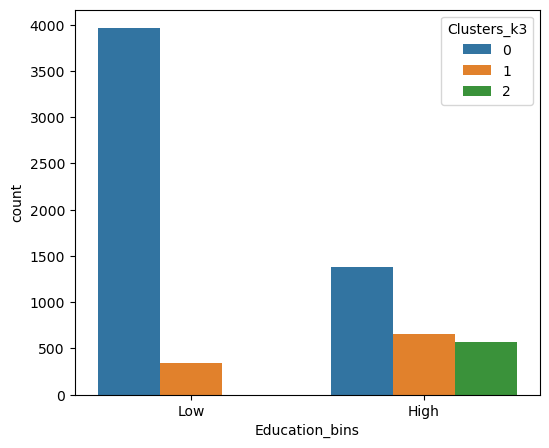

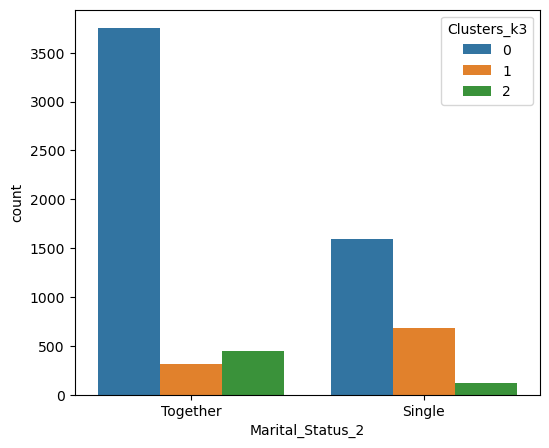

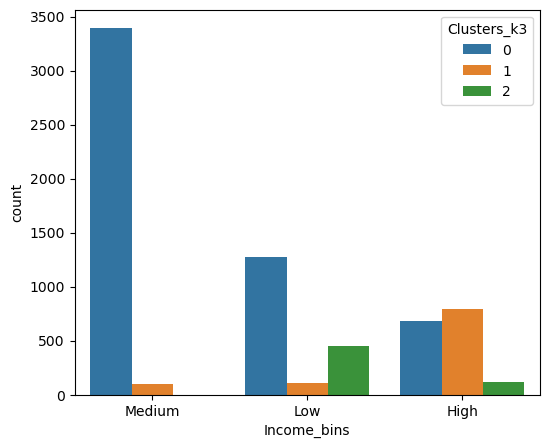

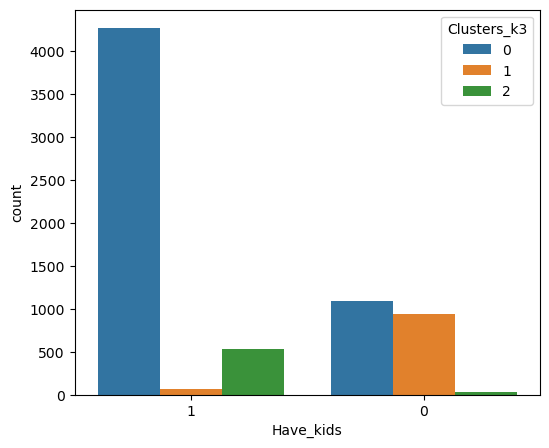

In [49]:
for i in var: 
    plt.subplots(figsize = (6,5))
    sns.countplot(x = var[i], order = var[i].value_counts().index, hue = combinedDf['Clusters_k3'])
    plt.show()

# Interpretation:

Education:
- 0:  Low (3965), High (1385)
- 1: High (651), Low (343)
- 2: High (570)

Marital Status:
- 0: Tgether (3754), Single (1596) 
- 1: Single (679), Together (315)   
- 2: Together (450), Single (120)

Income: 
- 0: M (3395), L (1275), H (680)
- 1: H (789), L (109), M (96)
- 2: L (454), H (116), M (0)          
         
Kids: 
- 0: 1 (4266), 0 (1084)
- 1: 0 (933), 1 (61)   
- 2: 1 (536), 0 (34)

__Overview:__

- Cluster 0: PP w/ low education, Together, medium income and w/ kids

- Cluster 1: PP w/ high education, single, high income and no kids 

- Cluster 2: PP w/ high education, together, low and high income and w/ kids 

In [58]:
combinedDf.groupby('Clusters_k3').describe(include = 'all')

CustomerID                                                     \
                 count unique top freq          mean          std     min   
Clusters_k3                                                                 
0               5350.0    NaN NaN  NaN  19956.521869  8670.927666  5078.0   
1                994.0    NaN NaN  NaN  20419.263581  8748.046261  5081.0   
2                570.0    NaN NaN  NaN  20324.805263  8744.887469  5084.0   

                                                 Education_bins               \
                  25%      50%      75%      max          count unique   top   
Clusters_k3                                                                    
0            12416.75  19908.5  27419.0  35072.0           5350      2   Low   
1            12766.25  20543.0  28074.5  35069.0            994      2  High   
2            12788.75  20648.0  28088.0  34910.0            570      1  High   

                                                     Marital_Status_2         \
             freq mean  std  min  25%  50%  75%  max            count unique   
Clusters_k3                                                                    
0            3965  NaN  NaN  NaN  NaN  NaN  NaN  NaN             5350      2   
1             651  NaN  NaN  NaN  NaN  NaN  NaN  NaN              994      2   
2             570  NaN  NaN  NaN  NaN  NaN  NaN  NaN              570      2   

                                                               Income_bins  \
                  top  freq mean  std  min  25%  50%  75%  max       count   
Clusters_k3                                                                  
0            Together  3754  NaN  NaN  NaN  NaN  NaN  NaN  NaN        5350   
1              Single   679  NaN  NaN  NaN  NaN  NaN  NaN  NaN         994   
2            Together   450  NaN  NaN  NaN  NaN  NaN  NaN  NaN         570   

                                                                    Have_kids  \
            unique     top  freq mean  std  min  25%  50%  75%  max     count   
Clusters_k3                                                                     
0                3  Medium  3395  NaN  NaN  NaN  NaN  NaN  NaN  NaN    5350.0   
1                3    High   789  NaN  NaN  NaN  NaN  NaN  NaN  NaN     994.0   
2                2     Low   454  NaN  NaN  NaN  NaN  NaN  NaN  NaN     570.0   

                                                                          
            unique top freq      mean       std  min  25%  50%  75%  max  
Clusters_k3                                                               
0              NaN NaN  NaN  0.797383  0.401987  0.0  1.0  1.0  1.0  1.0  
1              NaN NaN  NaN  0.061368  0.240125  0.0  0.0  0.0  0.0  1.0  
2              NaN NaN  NaN  0.940351  0.237044  0.0  1.0  1.0  1.0  1.0

# K-Modes, 'Cao', k = 4

In [53]:
demo_k4 = demo_n.copy()

In [54]:
km_k4 = KModes(n_clusters = 4, init = 'Cao', n_init = 1, verbose = 1)

clusters_4 = km_k4.fit_predict(demo_k4)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 245, cost: 6222.0


In [55]:
# Predicted clusters 

clusters_4

array([1, 0, 1, ..., 0, 3, 1], dtype=uint16)

In [56]:
clusterCentsDfk_4 = pd.DataFrame(km_k4.cluster_centroids_)

clusterCentsDfk_4.columns = demo_k4.columns

In [57]:
# Mode of Clusters

clusterCentsDfk_4

,Education_bins,Marital_Status_2,Income_bins,Have_kids
0,Low,Together,Medium,1
1,High,Single,High,0
2,High,Together,Low,1
3,Low,Single,Low,1


In [59]:
# Combining the predicted clusters with the original DF

In [60]:
demo_k4 = demo_n.reset_index()

In [61]:
cluster_Df = pd.DataFrame(clusters_4)
cluster_Df.columns = ['Clusters_k_4']
combi_Df = pd.concat([demo_k4, cluster_Df], axis = 1).reset_index()
combi_Df = combi_Df.drop(['index'], axis = 1)

In [62]:
combi_Df.head(5)

,CustomerID,Education_bins,Marital_Status_2,Income_bins,Have_kids,Clusters_k_4
0,14594,Low,Single,High,0,1
1,19070,Low,Together,High,0,0
2,29888,High,Together,High,0,1
3,12221,Low,Together,Medium,1,0
4,21107,Low,Single,High,0,1


In [63]:
combi_Df.value_counts('Clusters_k_4')

Clusters_k_4
0    4852
1     903
3     589
2     570
dtype: int64

# Data viz 

In [65]:
peido = combi_Df[['Education_bins', 'Marital_Status_2', 'Income_bins', 'Have_kids']]

for i in peido:
    print(combi_Df.groupby('Clusters_k_4')[i].value_counts().sort_index(ascending = True))

Clusters_k_4  Education_bins
0             High              1385
              Low               3467
1             High               651
              Low                252
2             High               570
3             Low                589
Name: Education_bins, dtype: int64
Clusters_k_4  Marital_Status_2
0             Single              1098
              Together            3754
1             Single               588
              Together             315
2             Single               120
              Together             450
3             Single               589
Name: Marital_Status_2, dtype: int64
Clusters_k_4        
0             Low        872
              Medium    3395
              High       585
1             Low         18
              Medium      96
              High       789
2             Low        454
              Medium       0
              High       116
3             Low        494
              Medium       0
              High        95
Name

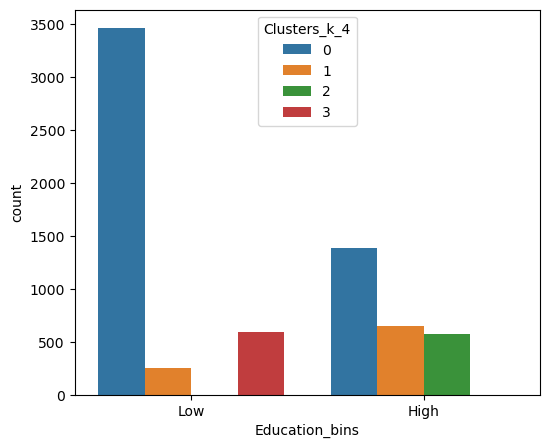

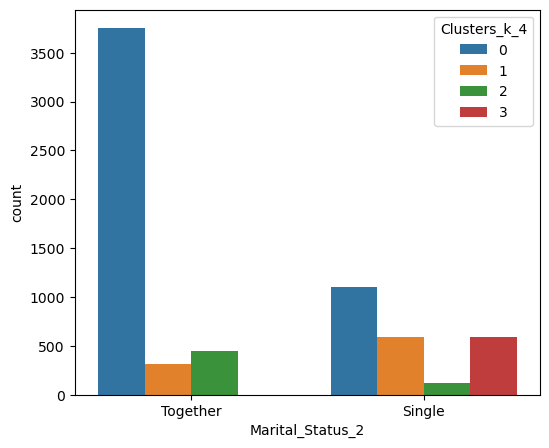

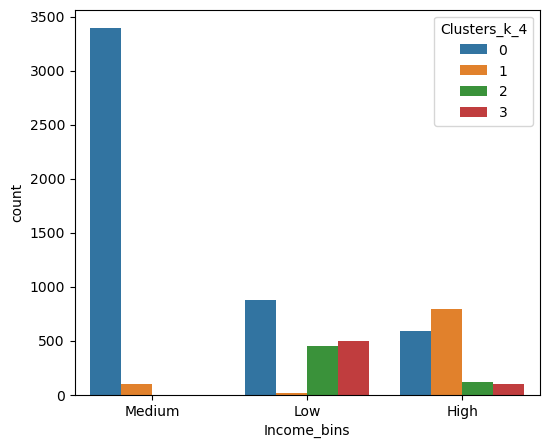

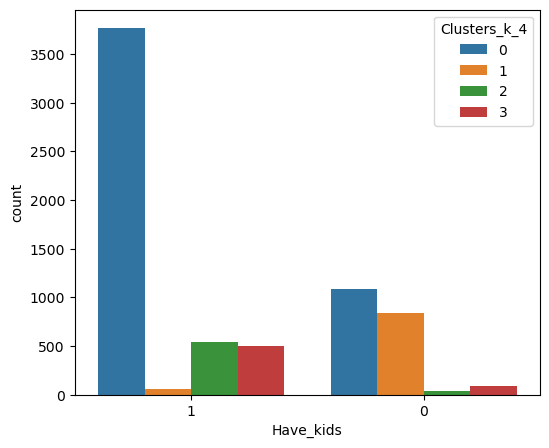

In [66]:
for f in peido: 
    plt.subplots(figsize = (6,5))
    sns.countplot(x = peido[f], order = peido[f].value_counts().index, hue = combi_Df['Clusters_k_4'])
    plt.show()

# Interpretation

Education:
- 0: L (3467), H (1385)
- 1: H (651), L (252) 
- 2: H (570) 
- 3: L (589)

Marital Status:
- 0: Together (3754) e Single (1098)
- 1: Single (588) e Together (315)
- 2: Together (450) e Single (120)
- 3: Singles (589)

Income: 
- 0: M (3395), L (872), H (585)
- 1: H (789), M (96), L (18)
- 2: L (454), H (116), M (0)
- 3: L (494), H (95), M (0)
         
Kids: 
- 0: 1 (3768), 0 (1084)
- 1: 0 (842), 1 (61) 
- 2: 1 (536), 0 (34)
- 3: 1 (498), 0 (91)

Overview:

- Cluster 0: PP w/ Low education, Together, Medium income and w/ kids

- Cluster 1: PP w/ high education, Single, high income and no kids

- Cluster 2: PP w/ high education, together, low income (although high too) and w/ kids

- cluster 3: PP w/ low education, single, low income and w/ kids

In [67]:
combi_Df.groupby('Clusters_k_4').describe(include = 'all')

CustomerID                                                     \
                  count unique top freq          mean          std     min   
Clusters_k_4                                                                 
0                4852.0    NaN NaN  NaN  19941.185903  8657.913905  5078.0   
1                 903.0    NaN NaN  NaN  20390.970100  8793.358727  5081.0   
2                 570.0    NaN NaN  NaN  20324.805263  8744.887469  5084.0   
3                 589.0    NaN NaN  NaN  20197.724958  8727.762350  5126.0   

                                                   Education_bins         \
                   25%      50%       75%      max          count unique   
Clusters_k_4                                                               
0             12448.25  19844.0  27401.75  35066.0           4852      2   
1             12422.00  20435.0  28064.00  35069.0            903      2   
2             12788.75  20648.0  28088.00  34910.0            570      1   
3             12632.00  20735.0  27590.00  35072.0            589      1   

                                                            Marital_Status_2  \
               top  freq mean  std  min  25%  50%  75%  max            count   
Clusters_k_4                                                                   
0              Low  3467  NaN  NaN  NaN  NaN  NaN  NaN  NaN             4852   
1             High   651  NaN  NaN  NaN  NaN  NaN  NaN  NaN              903   
2             High   570  NaN  NaN  NaN  NaN  NaN  NaN  NaN              570   
3              Low   589  NaN  NaN  NaN  NaN  NaN  NaN  NaN              589   

                                                                        \
             unique       top  freq mean  std  min  25%  50%  75%  max   
Clusters_k_4                                                             
0                 2  Together  3754  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1                 2    Single   588  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2                 2  Together   450  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3                 1    Single   589  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

             Income_bins                                                     \
                   count unique     top  freq mean  std  min  25%  50%  75%   
Clusters_k_4                                                                  
0                   4852      3  Medium  3395  NaN  NaN  NaN  NaN  NaN  NaN   
1                    903      3    High   789  NaN  NaN  NaN  NaN  NaN  NaN   
2                    570      2     Low   454  NaN  NaN  NaN  NaN  NaN  NaN   
3                    589      2     Low   494  NaN  NaN  NaN  NaN  NaN  NaN   

                  Have_kids                                                \
              max     count unique top freq      mean       std  min  25%   
Clusters_k_4                                                                
0             NaN    4852.0    NaN NaN  NaN  0.776587  0.416576  0.0  1.0   
1             NaN     903.0    NaN NaN  NaN  0.067553  0.251116  0.0  0.0   
2             NaN     570.0    NaN NaN  NaN  0.940351  0.237044  0.0  1.0   
3             NaN     589.0    NaN NaN  NaN  0.845501  0.361734  0.0  1.0   

                             
              50%  75%  max  
Clusters_k_4                 
0             1.0  1.0  1.0  
1             0.0  0.0  1.0  
2             1.0  1.0  1.0  
3             1.0  1.0  1.0

# K-Means 

In [139]:
from sklearn.cluster import KMeans

In [99]:
demo_c = demo.copy()

In [ ]:
demo_c

In [101]:
# Filling Education with mode 

mostfv = demo_c['Education'].mode()[0]

demo_c['Education'] = demo_c['Education'].fillna(mfv_)

In [113]:
# 

demo_c.Education = demo_c.Education.str.title() 

demo_c['Education_bins'] = demo_c.Education.replace({
    'Phd': 'High',
    'Master' : 'High',
    'Graduation': 'Low',
    'Basic' : 'Low',
    'Highschool' : 'Low'
})

In [107]:
# Creating 'Have_kids' 

demo_c['Have_kids'] = (demo_c['Kid_Younger6'] + demo_c['Children_6to18']).apply(lambda x: 1 if x > 0 else 0)

In [109]:
# Marital_Status 

demo_c.Marital_Status = demo_c.Marital_Status.str.title()

demo_c['Marital_Status_2'] = demo_c.Marital_Status.replace({
    'Married' : 'Together',
    'Single' : 'Single',
    'Divorced' : 'Single',
    'Widow' : 'Single'
})

In [110]:
# Income, Bining and droping outliers

In [111]:
demo_c.drop(demo_c[demo_c['Income'] > 200000].index, inplace = True)

In [115]:
demo_c['Income_bins'] = pd.cut(demo_c['Income'], 3, labels=["Low", "Medium", "High"])

## Ready to ordinal encoding: 

 - Have_kids (0 - don't, 1 - have)

 - Marital_Status (0 - single, 1 - together)

 - Education_bins (0 - Low, 1 - High)

 - Income_bins (0 - Low, 1 - Medium, 2 - High)

In [119]:
# Copy 

In [120]:
demo_c_copy = demo_c.copy()

In [125]:
# Preparing the dataset

In [123]:
demo_c_copy = demo_c_copy[['Have_kids', 'Marital_Status_2', 'Education_bins', 'Income_bins']]

In [ ]:
demo_c_copy.info()

In [126]:
# Ordinal encoding Marital_Status_2

In [ ]:
demo_c_copy['Marital_Status_2'] = demo_c_copy['Marital_Status_2'].replace('Single', 0).replace('Together', 1)
demo_c_copy.info()

In [ ]:
# Ordinal encoding Education_bins

In [ ]:
demo_c_copy['Education_bins'] = demo_c_copy['Education_bins'].replace('Low', 0).replace('High', 1)
demo_c_copy.info()

In [ ]:
# Ordinal encoding Income_bins

In [ ]:
demo_c_copy['Income_bins'] = demo_c_copy['Income_bins'].replace('Low', 0).replace('Medium', 1).replace('High', 2)
demo_c_copy.info()

In [131]:
print(demo_c_copy['Income_bins'].dtype)
demo_c_copy['Income_bins'] = demo_c_copy['Income_bins'].astype('int8')
demo_c_copy['Income_bins'].dtype

category


dtype('int8')

In [134]:
# Making a copy just in case ;) 

In [135]:
demo_kmeans = demo_c_copy.copy()

In [137]:
# Elbow method 

In [140]:
ks = range(1,11)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k).fit(demo_kmeans)
    inertias.append(model.inertia_)

In [141]:
# Ploting the intertia to identify the optimal k 

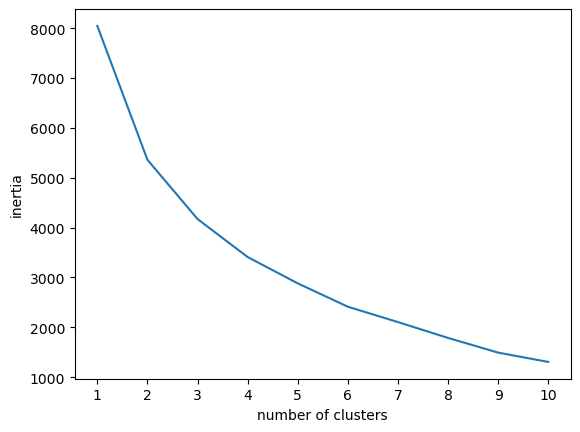

In [142]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')

# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')

# define the ticks on the x axis using the values of ks
plt.xticks(ks)

# call plt.show()
plt.show()

In [ ]:
# Dendogram

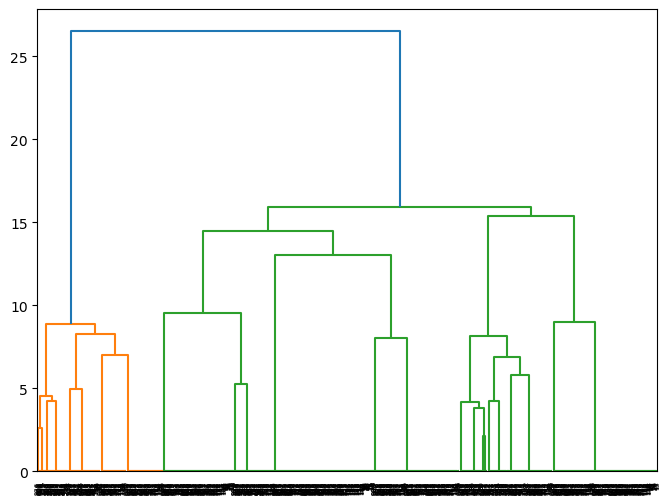

In [145]:
from scipy.cluster import hierarchy

#from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# Get a random sample, as hierarchical clustering can take a lot of time to run.
demo_kmeans_sample = demo_kmeans.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(demo_kmeans_sample, method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

## k = 2

In [150]:
model_k2 = KMeans(n_clusters = 2, random_state = 100).fit(demo_kmeans)

In [151]:
# Create a new column in the dataframe named label, which will store the cluster number that each observation belongs to.

demo_kmeans['label'] = model_k2.labels_

In [160]:
# obtain the centroid value for each cluster

demo_kmeans.groupby(['label']).describe().transpose()

label                             0            1
Have_kids        count  4736.000000  2178.000000
                 mean      0.937078     0.195133
                 std       0.242849     0.396394
                 min       0.000000     0.000000
                 25%       1.000000     0.000000
                 50%       1.000000     0.000000
                 75%       1.000000     0.000000
                 max       1.000000     1.000000
Marital_Status_2 count  4736.000000  2178.000000
                 mean      0.659206     0.641414
                 std       0.474026     0.479695
                 min       0.000000     0.000000
                 25%       0.000000     0.000000
                 50%       1.000000     1.000000
                 75%       1.000000     1.000000
                 max       1.000000     1.000000
Education_bins   count  4736.000000  2178.000000
                 mean      0.358319     0.417355
                 std       0.479557     0.493236
                 min       0.000000     0.000000
                 25%       0.000000     0.000000
                 50%       0.000000     0.000000
                 75%       1.000000     1.000000
                 max       1.000000     1.000000
Income_bins      count  4736.000000  2178.000000
                 mean      0.611909     1.727732
                 std       0.487367     0.445229
                 min       0.000000     1.000000
                 25%       0.000000     1.000000
                 50%       1.000000     2.000000
                 75%       1.000000     2.000000
                 max       1.000000     2.000000

## Interpretations

- Cluster 0: 4736 persons, kids, together, low educated and medium income? 
- cluster 1: 2178 persons, no kids, together, low educated and high income? 

## k = 3

In [154]:
demo_kmeans_3 = demo_c_copy.copy()

In [156]:
model_k3 = KMeans(n_clusters = 3, random_state = 100).fit(demo_kmeans_3)

In [157]:
demo_kmeans_3['label'] = model_k3.labels_

In [159]:
descr = demo_kmeans_3.groupby(['label']).describe().transpose()
descr

label                             0            1            2
Have_kids        count  1585.000000  3376.000000  1953.000000
                 mean      0.268139     0.827310     0.842294
                 std       0.443130     0.378035     0.364559
                 min       0.000000     0.000000     0.000000
                 25%       0.000000     1.000000     1.000000
                 50%       0.000000     1.000000     1.000000
                 75%       1.000000     1.000000     1.000000
                 max       1.000000     1.000000     1.000000
Marital_Status_2 count  1585.000000  3376.000000  1953.000000
                 mean      0.641009     0.653436     0.664107
                 std       0.479856     0.475946     0.472423
                 min       0.000000     0.000000     0.000000
                 25%       0.000000     0.000000     0.000000
                 50%       1.000000     1.000000     1.000000
                 75%       1.000000     1.000000     1.000000
                 max       1.000000     1.000000     1.000000
Education_bins   count  1585.000000  3376.000000  1953.000000
                 mean      0.411987     0.000000     1.000000
                 std       0.492348     0.000000     0.000000
                 min       0.000000     0.000000     1.000000
                 25%       0.000000     0.000000     1.000000
                 50%       0.000000     0.000000     1.000000
                 75%       1.000000     0.000000     1.000000
                 max       1.000000     0.000000     1.000000
Income_bins      count  1585.000000  3376.000000  1953.000000
                 mean      2.000000     0.595379     0.758321
                 std       0.000000     0.490891     0.428211
                 min       2.000000     0.000000     0.000000
                 25%       2.000000     0.000000     1.000000
                 50%       2.000000     1.000000     1.000000
                 75%       2.000000     1.000000     1.000000
                 max       2.000000     1.000000     1.000000

## Interpretations

- Cluster 0: 1585 pp, no kids, together (0.64), low educated, high income (?)
- cluster 1: 3376 pp, kids, together (0.65), low educated, low/medium income (?)
- cluster 2: 1953 pp, kids, together, high educated, high income (?)

## k = 4 

In [172]:
demo_kmeans_4 = demo_c_copy.copy()

In [174]:
model_k4 = KMeans(n_clusters = 4, random_state = 100).fit(demo_kmeans_4)

In [175]:
demo_kmeans_4['label'] = model_k4.labels_

In [179]:
demo_kmeans_4.groupby(['label']).describe().transpose()

label                             0            1            2            3
Have_kids        count  1838.000000  2297.000000  1350.000000  1429.000000
                 mean      0.837867     0.834131     0.842963     0.188244
                 std       0.368673     0.372044     0.363971     0.391043
                 min       0.000000     0.000000     0.000000     0.000000
                 25%       1.000000     1.000000     1.000000     0.000000
                 50%       1.000000     1.000000     1.000000     0.000000
                 75%       1.000000     1.000000     1.000000     0.000000
                 max       1.000000     1.000000     1.000000     1.000000
Marital_Status_2 count  1838.000000  2297.000000  1350.000000  1429.000000
                 mean      0.656148     1.000000     0.000000     0.710987
                 std       0.475122     0.000000     0.000000     0.453463
                 min       0.000000     1.000000     0.000000     0.000000
                 25%       0.000000     1.000000     0.000000     0.000000
                 50%       1.000000     1.000000     0.000000     1.000000
                 75%       1.000000     1.000000     0.000000     1.000000
                 max       1.000000     1.000000     0.000000     1.000000
Education_bins   count  1838.000000  2297.000000  1350.000000  1429.000000
                 mean      0.256801     0.419242     0.428889     0.414276
                 std       0.436988     0.493543     0.495101     0.492769
                 min       0.000000     0.000000     0.000000     0.000000
                 25%       0.000000     0.000000     0.000000     0.000000
                 50%       0.000000     0.000000     0.000000     0.000000
                 75%       1.000000     1.000000     1.000000     1.000000
                 max       1.000000     1.000000     1.000000     1.000000
Income_bins      count  1838.000000  2297.000000  1350.000000  1429.000000
                 mean      0.000000     1.000000     1.115556     2.000000
                 std       0.000000     0.000000     0.319810     0.000000
                 min       0.000000     1.000000     1.000000     2.000000
                 25%       0.000000     1.000000     1.000000     2.000000
                 50%       0.000000     1.000000     1.000000     2.000000
                 75%       0.000000     1.000000     1.000000     2.000000
                 max       0.000000     1.000000     2.000000     2.000000

## Interpretations

- Cluster 0: 1838 pp, kids, together, low educated, low income
- cluster 1: 2297 pp, kids, together, low educated, medium income
- cluster 2: 1350 pp, kids, single, low educated, medium income
- cluster 3: 1429 pp, no kids, together, low educated, high income